## Phase 1 Project 

# Aircraft Risk Analysis Project

# Overview

This analysis examines global aviation accident records with the aim of identifying insights that can guide safer aircraft choices and inform strategic decision-making. The dataset spans over 23,000 incidents, covering details such as aircraft type, operator, fatalities, and geographical distribution. 

Main objective: Provide clear, data-driven recommendations on which aircraft are associated with lower operational risks. These recommendations will be grounded in historical accident patterns and severity levels observed in the data.

The study is structured around a set of exploratory objectives that frame the analysis and visualization stages.


# Objectives

- To explore the frequency of accidents across aircraft makes and models.  
- To assess the severity of accidents by examining fatalities.  
- To analyze temporal patterns in aviation accidents.  
- To evaluate the geographical distribution of aviation accidents.  


Loading the dataset using Pandas

In [189]:
import pandas as pd
aviation_accidents = pd.read_csv("aviation-accident-data-2023-05-16.csv")

Dataset info : shows how the data is structured; rows, colums, and their data types. 

Also shows non-null values.

The dataset contains 23,967 rows, and 9 columns

It has a number of null entries

In [190]:
aviation_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [191]:
aviation_accidents.shape # number of rows and columns in the dataset

(23967, 9)

In [192]:
aviation_accidents.columns # column names in the dataset

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year'],
      dtype='object')

A brief look at the first five rows of the dataset

In [193]:
aviation_accidents.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


A look at the last 8 entries in the dataset

In [194]:
aviation_accidents.tail(8)

,date,type,registration,operator,fatalities,location,country,cat,year
23959,26-APR-2023,Boeing 777-233LR,C-FIUF,Air Canada,0,Sydney-Kingsford...,Australia,A2,2023
23960,09-MAY-2023,Cessna 208 Caravan 675,PK-HVG,Dimonim Air,0,Yabi Airstrip,Indonesia,A2,2023
23961,10-MAY-2023,Learjet 36A,N56PA,Phoenix Air,3,near San Clemente Isl...,USA,A1,2023
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023
23966,15-MAY-2023,Learjet 35A,D-CGFQ,GFD,2,Hohn Air Base,Germany,A1,2023


A summary of the dataset's stats for better understanding

In [195]:
aviation_accidents.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


This step -unlike using the describe()- gives summary statistics for both numeric and categorical columns.

Will help us understand ranges, most frequent values, and distributions.


In [196]:
# Descriptive statistics
aviation_accidents.describe(include="all").T


,count,unique,top,freq
date,23967,15079,10-MAY-1940,171
type,23967,3201,Douglas C-47A (DC-3),1916
registration,22419,21962,LZ-...,13
operator,23963,6017,USAAF,2604
fatalities,20029,369,0,10713
location,23019,14608,unknown,272
country,23967,232,USA,4377
cat,23967,11,A1,17424
year,23967,106,1944,1505


## Data cleaning

Dealing with data types conversions and missing values

Converting date to datetime

In [197]:
aviation_accidents["date"] = pd.to_datetime(aviation_accidents["date"],errors='coerce')


C:\Users\PC\AppData\Local\Temp\ipykernel_15120\2608791806.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation_accidents["date"] = pd.to_datetime(aviation_accidents["date"],errors='coerce')


A look ate the cleaned data

Still some columns not in correct type, like year should be numeric

In [198]:
aviation_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23967 non-null  object        
 2   registration  22419 non-null  object        
 3   operator      23963 non-null  object        
 4   fatalities    20029 non-null  object        
 5   location      23019 non-null  object        
 6   country       23967 non-null  object        
 7   cat           23967 non-null  object        
 8   year          23967 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 1.6+ MB


In [199]:
aviation_accidents["year"] = pd.to_numeric(aviation_accidents["year"],errors='coerce')  

# converting year to numeric

In [200]:
aviation_accidents["year"] = aviation_accidents["year"].astype("Int64")

# converting year to integer to eliminate decimal points

In [201]:
aviation_accidents['year'].isna().sum()

#upon conversion, we get 61 missing/unknown values in the tear column which have to be solved

np.int64(61)

Confirming the data types in the cleaned data

All columns are now well converted to their proper data types

In [202]:
aviation_accidents.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities              object
location                object
country                 object
cat                     object
year                     Int64
dtype: object

## Missing values 

Checking and dealing with missing values in the dataset

Checking number of missing values per column in the dataset

In [203]:
aviation_accidents.isna().sum() 

# there are missing values in registration,fatalities, location, and year columns that have to be fixed

date             559
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year              61
dtype: int64

Using dropna to fix the nulls

Dropna is used here since droping the missing values leaves us with 77.02% of the data which is worth using

In [204]:
aviation_accidents_cleaned = aviation_accidents.dropna()

# assigned the cleaned dataset to a new variable to preserve the original dataset

Quick look at the new dataset shape

In [205]:
aviation_accidents_cleaned.shape

# 5511 columns with missing values droped


(18456, 9)

Checking on duplicates in the new dataset

In [206]:
aviation_accidents_cleaned.duplicated().value_counts()

# only 1 duplicate found

False    18455
True         1
Name: count, dtype: int64

Eliminating the duplicate

In [207]:
aviation_accidents_cleaned = aviation_accidents_cleaned.drop_duplicates()

In [208]:
aviation_accidents_cleaned.duplicated().value_counts()

# duplicate eliminated. 

False    18455
Name: count, dtype: int64

In [209]:
aviation_accidents_cleaned.info()

# the new dataset has no null values and no duplicates
# columns properly converted to their right types

<class 'pandas.core.frame.DataFrame'>
Index: 18455 entries, 62 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18455 non-null  datetime64[ns]
 1   type          18455 non-null  object        
 2   registration  18455 non-null  object        
 3   operator      18455 non-null  object        
 4   fatalities    18455 non-null  object        
 5   location      18455 non-null  object        
 6   country       18455 non-null  object        
 7   cat           18455 non-null  object        
 8   year          18455 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 1.4+ MB


In [210]:
aviation_accidents_cleaned.head()

,date,type,registration,operator,fatalities,location,country,cat,year
62,1919-08-11,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
64,1920-02-25,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
66,1920-12-14,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920


# Exploratory Analysis 

The analysis is structured around specific objectives.  
Each objective focuses on a distinct perspective of aviation accidents, supported by visualizations and interpretations.


## Objective 1: Accident frequency by aircraft make/model

To explore the frequency of accidents across aircraft makes and identify which manufacturers appear most often in the dataset.


In [235]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

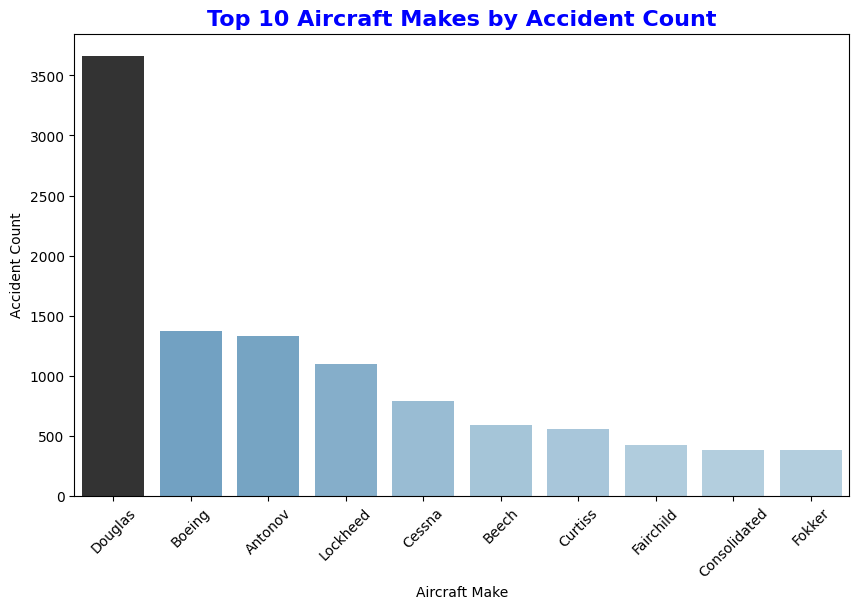

In [236]:
from operator import le


top_makes = aviation_accidents_cleaned['type'].astype(str).str.split().str[0].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="Blues_d", hue=top_makes, legend=False)
plt.title("Top 10 Aircraft Makes by Accident Count", fontsize=16, fontweight='bold', color='blue')
plt.xlabel("Aircraft Make")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()

The bar chart highlights the aircraft makes with the highest number of accidents recorded.  
This shows where most incidents are concentrated, although it does not account for exposure (e.g., number of flights per make).  
Higher counts may reflect popularity in use rather than inherent risk.